In [44]:
import matplotlib
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("paper")
sns.set_style("whitegrid")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = 15,9

In [45]:
foldername1 = "../../results_all/micro_bootstrapping_influx_opti"
foldername2 = "../../results_all/micro_bootstrapping_influx"
foldername3 = "../../results_all/micro_bootstrapping_vm_opti"
foldername4 = "../../results_all/micro_bootstrapping_vm"

In [46]:
variances = []

all_files = glob.glob(foldername1 + "/*")
for file in all_files:
    # Check if it's a csv file
    if (str(file).endswith(".csv")):

        df_results = pd.read_csv(file, sep=";", usecols=['number','medianPerfChange',
                                                         'minSmall', 'maxSmall'], index_col="number")

        nameparts=str(file).split("\\")
        name = nameparts[1]
        name = name[:-4]

        for index, row in df_results.iterrows():
            min = row["minSmall"]
            max = row["maxSmall"]
            var = max - min

            variances.append({
                "SUT" : "influxOpti",
                "name" : name,
                "var" : var
            })

all_files = glob.glob(foldername2 + "/*")
for file in all_files:
    # Check if it's a csv file
    if (str(file).endswith(".csv")):

        df_results = pd.read_csv(file, sep=";", usecols=['number','medianPerfChange',
                                                         'minSmall', 'maxSmall'], index_col="number")

        nameparts=str(file).split("\\")
        name = nameparts[1]
        name = name[:-4]

        for index, row in df_results.iterrows():
            min = row["minSmall"]
            max = row["maxSmall"]
            var = max - min

            variances.append({
                "SUT" : "influx",
                "name" : name,
                "var" : var
            })

all_files = glob.glob(foldername3 + "/*")
for file in all_files:
    # Check if it's a csv file
    if (str(file).endswith(".csv")):

        df_results = pd.read_csv(file, sep=";", usecols=['number','medianPerfChange',
                                                         'minSmall', 'maxSmall'], index_col="number")

        nameparts=str(file).split("\\")
        name = nameparts[1]
        name = name[:-4]

        for index, row in df_results.iterrows():
            min = row["minSmall"]
            max = row["maxSmall"]
            var = max - min

            variances.append({
                "SUT" : "vmOpti",
                "name" : name,
                "var" : var
            })

all_files = glob.glob(foldername4 + "/*")
for file in all_files:
    # Check if it's a csv file
    if (str(file).endswith(".csv")):

        df_results = pd.read_csv(file, sep=";", usecols=['number','medianPerfChange',
                                                         'minSmall', 'maxSmall'], index_col="number")

        nameparts=str(file).split("\\")
        name = nameparts[1]
        name = name[:-4]
        for index, row in df_results.iterrows():
            min = row["minSmall"]
            max = row["maxSmall"]
            var = max - min

            variances.append({
                "SUT" : "vm",
                "name" : name,
                "var" : var
            })

In [47]:
df_vars = pd.DataFrame(variances)

<ipython-input-48-454944b98efb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(labels)


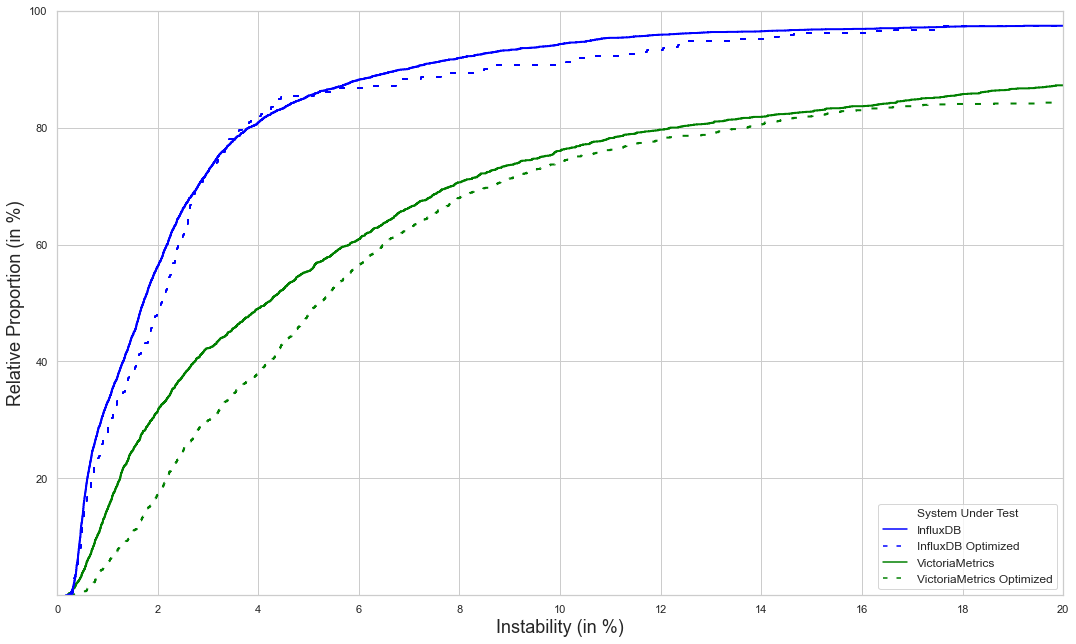

In [48]:
sns.set(style="whitegrid")
hue_order = ["influx","influxOpti","vm","vmOpti"]
myLabels=["InfluxDB", "InfluxDB Optimized", "VictoriaMetrics", "VictoriaMetrics Optimized"]
plot = sns.ecdfplot(data=df_vars, x="var", hue="SUT", hue_order=hue_order, stat="proportion")
plot.legend(fontsize="medium", loc=4, title='System Under Test', labels=myLabels)

mySpecialStyle=(0, (3, 6))
for line, linestyle, color, legend_handle in zip(plot.lines[::-1], ['-', mySpecialStyle, '-', mySpecialStyle], ["blue", "blue", "green", "green"], plot.legend_.legendHandles):
    line.set_linestyle(linestyle)
    line.set_color(color)
    line.set_linewidth(2)
    legend_handle.set_linestyle(linestyle)
    legend_handle.set_color(color)

#
plot.set_xticks([0,2,4,6,8,10,12,14,16,18,20])

labels = [item.get_text() for item in plot.get_yticklabels()]
labels[1] = '20'
labels[2] = '40'
labels[3] = '60'
labels[4] = '80'
labels[5] = '100'

plot.set_yticklabels(labels)

#plot.set_yticks([0,1])

plt.xlim(0, 20)
plt.tight_layout()
plt.xlabel('Instability (in %)', fontsize=18)
plt.ylabel('Relative Proportion (in %)', fontsize=18)


plot.get_figure().savefig("micro_stability.pdf", bbox_inches='tight')
#plt.legend(loc=1, fontsize="medium")